### Oppgave 3d: Implementere Eulers metode

Løs Lane-Emden numerisk for n = 1, og sammenlign med den analytiske løsningen.

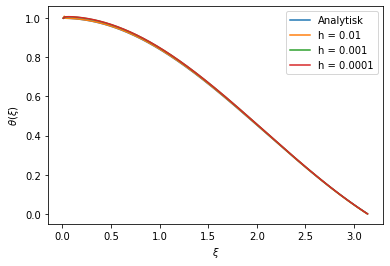

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def step_euler(y,t, h, f, n):
    ''' Performs one step of Euler's method. '''
    return y + h*f(y,t, n)

def full_euler(h, f, n, y_0 = 1, start_t = 0.01, end_t = 3):
    ''' Performs all steps in Euler's method'''
    t_list = np.zeros(1)
    y_list = np.zeros((1,2))
    t_list[0] = start_t
    y_list[0] = y_0
    i = 0
    while True:
        next_value = step_euler(y_list[i], t_list[i], h, f, n)
        if next_value[0] <= 0:
            break
        else: 
            t_list = np.append(t_list, t_list[i]+h)
            y_list = np.vstack((y_list, next_value))
            y_list[i+1] = next_value
            i+=1
    return t_list, y_list

def lane_emden_analytical(t):
    return np.sin(t)/t

def lane_emden(y, t, n):
    return np.array([y[1], -y[0]**(n)-2*y[1]/t])

#task 3d:
h1 = 0.01
h2 = 0.001
h3 = 0.0001
n = 1
t_list1, yh1 = full_euler(h1, lane_emden, n)
t_list2, yh2 = full_euler(h2, lane_emden, n)
t_list3, yh3 = full_euler(h3, lane_emden, n)
plt.plot(t_list1, lane_emden_analytical(t_list1), label="Analytisk")
plt.plot(t_list1, yh1[:,0], label="h = "+str(h1))
plt.plot(t_list2, yh2[:,0], label="h = "+str(h2))
plt.plot(t_list3, yh3[:,0], label="h = "+str(h3))
plt.xlabel(r'$\xi$')
plt.ylabel(r'$\theta(\xi)$')
plt.legend()
#plt.savefig("3d.pdf", bbox_inches='tight')
plt.show()

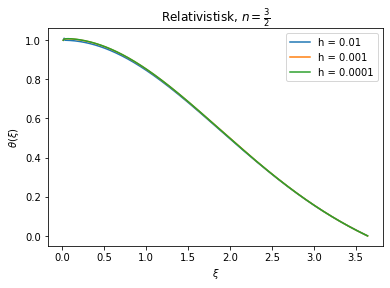

$\xi_N$ = 3.6399999999999664 h1 = 0.01, n = 3/2
ξ_N²|θ'(ξ_N)|= 2.7303004917826343 h1 = 0.01, n = 3/2
$\xi_N$ = 3.6439999999997097 h2 = 0.001, n = 3/2
ξ_N²|θ'(ξ_N)|= 2.7342188627408475 h2 = 0.001, n = 3/2
$\xi_N$ = 3.644700000003267 h3 = 0.0001, n = 3/2
ξ_N²|θ'(ξ_N)|= 2.7346509968178383 h3 = 0.0001, n = 3/2


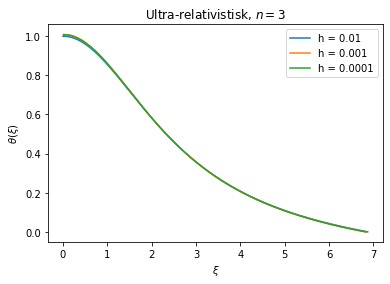

$\xi_N$ = 6.869999999999898 h1 = 0.01, n = 3
ξ_N²|θ'(ξ_N)|= 2.0116904728124787 h1 = 0.01, n = 3
$\xi_N$ = 6.832000000000616 h2 = 0.001, n = 3
ξ_N²|θ'(ξ_N)|= 2.017823414964884 h2 = 0.001, n = 3
$\xi_N$ = 6.828299999997425 h3 = 0.0001, n = 3
ξ_N²|θ'(ξ_N)|= 2.0185025929619127 h3 = 0.0001, n = 3


In [20]:
#task 3e)
#Solved in relativistic and ultra-relativistic cases!
h1 = 0.01
h2 = 0.001
h3 = 0.0001
n1 = 3/2 #relativistic
n2 = 3 #ultrarelativistic
t_list1, yh1 = full_euler(h1, lane_emden, n1)
t_list2, yh2 = full_euler(h2, lane_emden, n1)
t_list3, yh3 = full_euler(h3, lane_emden, n1)
plt.plot(t_list1, yh1[:,0], label="h = "+str(h1))
plt.plot(t_list2, yh2[:,0], label="h = "+str(h2))
plt.plot(t_list3, yh3[:,0], label="h = "+str(h3))
plt.xlabel(r'$\xi$')
plt.ylabel(r'$\theta(\xi)$')
plt.title(r"Relativistisk, $n = \frac{3}{2}$")
plt.legend()
plt.savefig("3eRel.pdf", bbox_inches='tight')
plt.show()

print(r'$\xi_N$ =',t_list1[-1], "h1 = 0.01, n = 3/2")
print("ξ_N²|θ'(ξ_N)|=", t_list1[-1]**2*np.abs((yh1[:,0][-1]-yh1[:,0][-2])/h1), "h1 = 0.01, n = 3/2")
print()
print('ξ_N$ =',t_list2[-1], "h2 = 0.001, n = 3/2")
print("ξ_N²|θ'(ξ_N)|=", t_list2[-1]**2*np.abs((yh2[:,0][-1]-yh2[:,0][-2])/h2), "h2 = 0.001, n = 3/2")
print()
print('ξ_N =',t_list3[-1], "h3 = 0.0001, n = 3/2")
print("ξ_N²|θ'(ξ_N)|=", t_list3[-1]**2*np.abs((yh3[:,0][-1]-yh3[:,0][-2])/h3), "h3 = 0.0001, n = 3/2")

t_list1Ultra, yh1Ultra = full_euler(h1, lane_emden, n2)
t_list2Ultra, yh2Ultra = full_euler(h2, lane_emden, n2)
t_list3Ultra, yh3Ultra = full_euler(h3, lane_emden, n2)
plt.plot(t_list1Ultra, yh1Ultra[:,0], label="h = "+str(h1))
plt.plot(t_list2Ultra, yh2Ultra[:,0], label="h = "+str(h2))
plt.plot(t_list3Ultra, yh3Ultra[:,0], label="h = "+str(h3))
plt.xlabel(r'$\xi$')
plt.ylabel(r'$\theta(\xi)$')
plt.title(r"Ultra-relativistisk, $n = 3$")
plt.legend()
plt.savefig("3eUltra.pdf", bbox_inches='tight')
plt.show()

print('ξ_N =',t_list1Ultra[-1], "h1 = 0.01, n = 3")
print("ξ_N²|θ'(ξ_N)|=", t_list1Ultra[-1]**2*np.abs((yh1Ultra[:,0][-1]-yh1Ultra[:,0][-2])/h1), "h1 = 0.01, n = 3")
print()
print('ξ_N =',t_list2Ultra[-1], "h2 = 0.001, n = 3")
print("ξ_N²|θ'(ξ_N)|=", t_list2Ultra[-1]**2*np.abs((yh2Ultra[:,0][-1]-yh2Ultra[:,0][-2])/h2), "h2 = 0.001, n = 3")
print()
print('ξ_N =',t_list3Ultra[-1], "h3 = 0.0001, n = 3")
print("ξ_N²|θ'(ξ_N)|=", t_list3Ultra[-1]**2*np.abs((yh3Ultra[:,0][-1]-yh3Ultra[:,0][-2])/h3), "h3 = 0.0001, n = 3")